### 01 packages

In [18]:
##########################################################################################
##########################################################################################

import matplotlib

import matplotlib.pyplot as plt

from matplotlib.ticker import MultipleLocator, FormatStrFormatter

##########################################################################################
##########################################################################################

import numpy as np

import math

##########################################################################################
##########################################################################################

from shapely.geometry import Point

import networkx as nx

##########################################################################################
##########################################################################################

import warnings

warnings.filterwarnings("ignore")

### 02 hexagon class

In [19]:
##########################################################################################
##########################################################################################

class Hexagon(object):
    
    def __init__(self, length):
        
        self.length = length  # Length of the hexagon
        
        # Define the relative positions of the six surrounding hexagons
        self.adjacent_delta = [
            (3 * self.length / 2, np.sqrt(3) * self.length / 2),
            (3 * self.length / 2, -np.sqrt(3) * self.length / 2),
            (0, np.sqrt(3) * self.length),
            (0, -np.sqrt(3) * self.length),
            (-3 * self.length / 2, np.sqrt(3) * self.length / 2),
            (-3 * self.length / 2, -np.sqrt(3) * self.length / 2)
        ]
        
    def center_to_vertice(self, center):
        
        # Calculate the coordinates of the vertices of the hexagon
        angles = np.linspace(0, 2 * np.pi, 7)
        vertices = np.zeros([7, 2])
        vertices[:, 0] = center[0] + self.length * np.cos(angles)
        vertices[:, 1] = center[1] + self.length * np.sin(angles)
        vertices[-1, :] = vertices[0, :]
        return vertices
    
    def get_adjacent_centers(self, center):
        
        # Calculate the coordinates of the adjacent centers of the center
        adjacent_centers = list()
        for i in range(6):
            x = center[0] + self.adjacent_delta[i][0]
            y = center[1] + self.adjacent_delta[i][1]
            adjacent_centers.append((x, y))
        return adjacent_centers
    
    def get_ring_centers(self, center, ring=3):
        
        # Calculate the coordinates of the centers of the center
        
        adjacent_centers = [center]
        
        searching_centers = [center]
        
        visited_centers  = list()
        
        r=0
        
        while r<ring:
            
            for select_center in searching_centers:
                
                candidate_centers = self.get_adjacent_centers(select_center)
                
                candidate_centers = [c for c in candidate_centers if c not in adjacent_centers]
                
                adjacent_centers += candidate_centers
                
                visited_centers.append(select_center)

            searching_centers = [c for c in adjacent_centers if c not in visited_centers]
                
            r+=1
            
        return adjacent_centers
                
                
            
            
    
    

### 03 Hexagon database

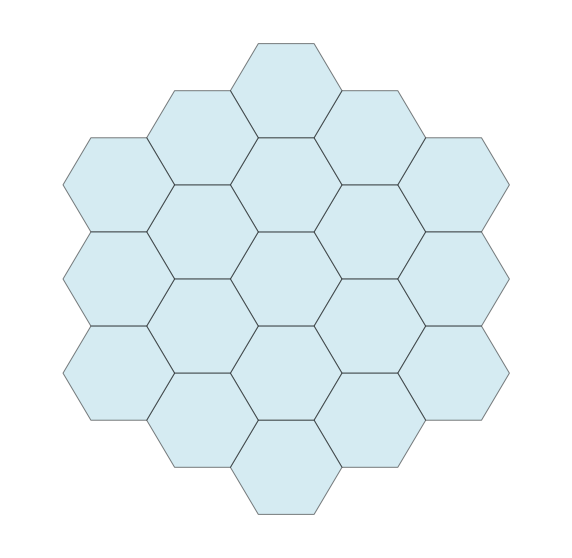

In [20]:
##########################################################################################
##########################################################################################

length=1e3

origin=(0,0)

##########################################################################################
##########################################################################################

Hex=Hexagon(length)

Adjacent_centers=Hex.get_ring_centers(origin,ring=2)

##########################################################################################
##########################################################################################

# Encode

i=0

Hexagons=list()

Hexagon_Center={}

Center_Hexagon={}

while i<len(Adjacent_centers):
    
    center=Adjacent_centers[i]
    
    hexagon_id="H"+str(i+1)
    
    if i+1==4:
        
        hexagon_id="H7"
        
    elif i+1==5:
        
        hexagon_id="H4"
        
    elif i+1==7:
        
        hexagon_id="H5"
        
    elif i+1==11:
        
        hexagon_id="H10"
        
    elif i+1==12:
        
        hexagon_id="H11"
        
    elif i+1==15:
        
        hexagon_id="H12"
        
    elif i+1==16:
        
        hexagon_id="H13"
        
    elif i+1==19:
        
        hexagon_id="H14"
        
    elif i+1==18:
        
        hexagon_id="H15"
        
    elif i+1==17:
        
        hexagon_id="H16"
        
    elif i+1==14:
        
        hexagon_id="H17"
        
    elif i+1==13:
        
        hexagon_id="H18"
        
    elif i+1==10:
        
        hexagon_id="H19"
        
    
    Hexagons.append(hexagon_id)
    
    Hexagon_Center[hexagon_id]=center
    
    Center_Hexagon[center]=hexagon_id
    
    i+=1
    
##########################################################################################
##########################################################################################

Hexagons_Neighbors={}

for hexagon_id in Hexagons:
    
    center=Hexagon_Center[hexagon_id]
    
    Hexagons_Neighbors[hexagon_id]=[Center_Hexagon[center_] for center_ in Hex.get_adjacent_centers(center) if center_ in Adjacent_centers]
    
Hexagons_Neighbors

##########################################################################################
##########################################################################################

figsize = 10,10

font_title = {'family' : 'Arial','weight' : 'normal','size': 40}

font_label = {'family' : 'Arial','weight' : 'normal','size': 20}

font_legend = {'family' : 'Arial','weight' : 'normal','size': 15}

figure, axs = plt.subplots(figsize=figsize)

labels = axs.get_xticklabels() + axs.get_yticklabels()

[label.set_fontsize(15) for label in labels]

[label.set_fontname('Arial') for label in labels]
    
axs.set_xlabel('X',font_label)

axs.set_ylabel('Y',font_label)

axs.set_xlim([-5000,5000])

axs.set_ylim([-5000,5000])

Hexagon_Vertices={}

for center in Adjacent_centers:
    
    hexagon_id=Center_Hexagon[center]
    
    vertice = Hex.center_to_vertice(center)
    
    vertice=np.round(vertice, decimals=2)
    
    Hexagon_Vertices[hexagon_id]=vertice
    
    hexagon = matplotlib.patches.Polygon(vertice, closed=True, edgecolor='black', facecolor='lightblue',alpha=.5)
    
    axs.add_patch(hexagon)
    
# Hide the x and y axes
plt.axis('off')

plt.show()

##########################################################################################
##########################################################################################

Hexagon_Layer={}

for hexagon in Hexagons:
    
    center = Hexagon_Center[hexagon]
    
    dist_= Point(center).distance(Point(origin))
    
    if dist_/(1e3*np.sqrt(3))==0:
        
        layer=0
        
    elif dist_/(1e3*np.sqrt(3))<=1:
        
        layer=1
        
    else:
        
        layer=2
    
    Hexagon_Layer[hexagon]=layer

np.save('./01network/01/Hexagon_Layer',Hexagon_Layer)


### 04 Hexagonal road network

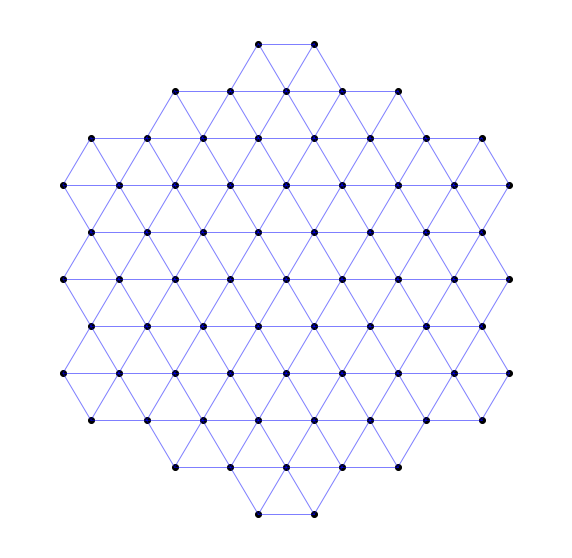

In [21]:
##########################################################################################
##########################################################################################

Road_Graph= nx.Graph()

##########################################################################################
##########################################################################################

Nodes=list()

Edges=list()

##########################################################################################
##########################################################################################

Hexagon_nodes={hexagon_id:list() for hexagon_id in Hexagons}

Hexagon_edges={hexagon_id:list() for hexagon_id in Hexagons}

##########################################################################################
##########################################################################################

for hexagon_id in Hexagons:
    
    center=tuple([round(x,2) for x in Hexagon_Center[hexagon_id]])
    
    vertices=Hexagon_Vertices[hexagon_id]
    
    ##########################################################################################
    ##########################################################################################
    
    Hexagon_nodes[hexagon_id].append(center)
    
    if center not in Road_Graph.nodes:
        
        Road_Graph.add_node(center)
        
        Nodes.append(center)
        
        
        
    ##########################################################################################
    ##########################################################################################
    
    for vertice in vertices:
        
        vertice=tuple([round(x,2) for x in vertice])
        
        Hexagon_nodes[hexagon_id].append(vertice)
    
        if vertice not in Road_Graph.nodes:
        
            Road_Graph.add_node(vertice)
            
            Nodes.append(vertice)
            
        Road_Graph.add_edge(center, vertice, weight=Point(center).distance(Point(vertice)))
        
        Hexagon_edges[hexagon_id].append((center, vertice))
        
        Edges.append((center, vertice))
        
    ##########################################################################################
    ##########################################################################################
    
    for i in range(1,len(vertices),1):
        
        vertice1=tuple([round(x,2) for x in vertices[i-1]])
        
        vertice2=tuple([round(x,2) for x in vertices[i]])
        
        Hexagon_edges[hexagon_id].append((vertice1, vertice2))
        
        if (vertice1, vertice2) not in Road_Graph.edges:
        
            Road_Graph.add_edge(vertice1, vertice2, weight=Point(vertice1).distance(Point(vertice2)))
            
            Edges.append((vertice1, vertice2))
        
        
            
##########################################################################################
##########################################################################################

figsize = 10,10

font_title = {'family' : 'Arial','weight' : 'normal','size': 40}

font_label = {'family' : 'Arial','weight' : 'normal','size': 20}

font_legend = {'family' : 'Arial','weight' : 'normal','size': 15}

figure, axs = plt.subplots(figsize=figsize)

labels = axs.get_xticklabels() + axs.get_yticklabels()

[label.set_fontsize(15) for label in labels]

[label.set_fontname('Arial') for label in labels]
    
axs.set_xlabel('X',font_label)

axs.set_ylabel('Y',font_label)

axs.set_xlim([-5000,5000])

axs.set_ylim([-5000,5000])
    
for edge in Road_Graph.edges:
    
    axs.plot([edge[0][0],edge[1][0]],[edge[0][1],edge[1][1]], color='blue',linewidth=1,linestyle='-',alpha=.5)

for node in Road_Graph.nodes:
    
    axs.scatter(node[0], node[1], color='black')

    
# Hide the x and y axes
plt.axis('off')

plt.show()

### 05 Add Lockers in the network

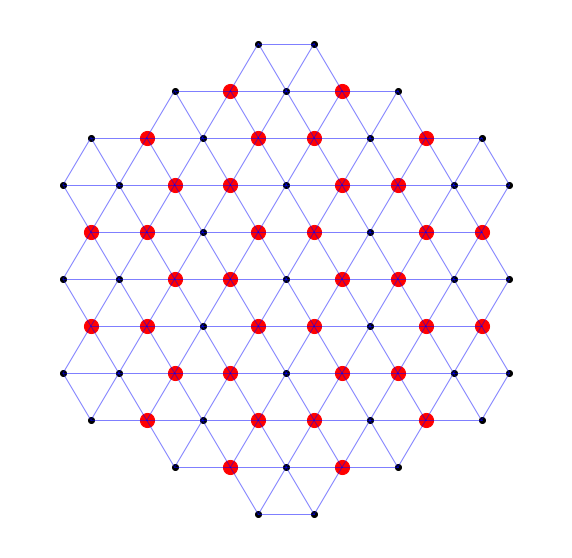

In [22]:
##########################################################################################
##########################################################################################

Lockers=list()

Hexagon_Locker={}

Locker_Hexagon={}

for hexagon_id in Hexagons:
    
    vertices=Hexagon_Vertices[hexagon_id]
    
    hexagon_lockers=list()
    
    for i in range(len(vertices)-1):
        
        # Calculate the midpoint between the current vertex and the next vertex (to close the polygon)
        
        ##########################################################################################
        
        locker = tuple([round(x,2) for x in vertices[i]])
        
        ##########################################################################################
        
        for hexagon_id_ in Hexagons:
            
            vertices_=Hexagon_Vertices[hexagon_id_]
            
            vertices_=[tuple([round(x,2) for x in y]) for y in vertices_]
            
            if hexagon_id_!=hexagon_id:
                
                if locker in vertices_:
                    
                    ##########################################################################################

                    if locker not in Lockers:

                        Lockers.append(locker)

                    if locker not in Locker_Hexagon.keys():

                        Locker_Hexagon[locker]=[hexagon_id]

                    else:

                        Locker_Hexagon[locker].append(hexagon_id)
            
            
    Hexagon_Locker[hexagon_id]=hexagon_lockers
    
##########################################################################################
##########################################################################################

figsize = 10,10

font_title = {'family' : 'Arial','weight' : 'normal','size': 40}

font_label = {'family' : 'Arial','weight' : 'normal','size': 20}

font_legend = {'family' : 'Arial','weight' : 'normal','size': 15}

figure, axs = plt.subplots(figsize=figsize)

labels = axs.get_xticklabels() + axs.get_yticklabels()

[label.set_fontsize(15) for label in labels]

[label.set_fontname('Arial') for label in labels]
    
axs.set_xlabel('X',font_label)

axs.set_ylabel('Y',font_label)

axs.set_xlim([-5000,5000])

axs.set_ylim([-5000,5000])
    
for edge in Road_Graph.edges:
    
    axs.plot([edge[0][0],edge[1][0]],[edge[0][1],edge[1][1]], color='blue',linewidth=1,linestyle='-',alpha=.5)

for node in Road_Graph.nodes:
    
    if node not in Lockers:
    
        axs.scatter(node[0], node[1], color='black')
        
    else:
        
        axs.scatter(node[0], node[1], color='red',s=200)
        


    
# Hide the x and y axes

plt.axis('off')

plt.show()

##########################################################################################
##########################################################################################

nx.write_graphml(Road_Graph, "./01network/01/Road_Graph.graphml")

np.save('./01network/01/Nodes',Nodes)

np.save('./01network/01/Edges',Edges)

##########################################################################################
##########################################################################################

np.save('./01network/01/Hexagon_nodes',Hexagon_nodes)

np.save('./01network/01/Hexagon_edges',Hexagon_edges)

##########################################################################################
##########################################################################################

np.save('./01network/01/Hexagons',Hexagons)

np.save('./01network/01/Centers',Adjacent_centers)

np.save('./01network/01/Hexagon_Vertices',Hexagon_Vertices)

np.save('./01network/01/Hexagon_Center',Hexagon_Center)

np.save('./01network/01/Center_Hexagon',Center_Hexagon)

np.save('./01network/01/Hexagons_Neighbors',Hexagons_Neighbors)

##########################################################################################
##########################################################################################


np.save('./01network/01/Lockers',Lockers)

np.save('./01network/01/Locker_Hexagon',Locker_Hexagon)

np.save('./01network/01/Hexagon_Locker',Hexagon_Locker)


In [23]:
len(Lockers)

36